#**Youtube Video Analysis**


###**ACTIVITIES**
##Initial Data Cleaning

1) Using json file to add the category column to the data replacing the category Id column

2) Check the data types of all the variable if they are appropriate for analysis

3) Converting the two columns publishedAt and trending_date to datetime

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"


## Framing Questions for Analysis
1.  Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments

2.  Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well 

3. Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)

4. What's the average time taken for a video to be in trending categorically?

5. What's the average no.of views required to enter into trending?

6. Which Youtube channel in India has more videos in Trending?

7. Understanding the significance of Likes,Dislikes and Comments.

###FURTHER ANALYSIS :: You can do your own pace


1) Which category of videos have comments disabled ? 

2) Which category of videos have ratings disabled ? 

3) Most watched video in India overall | Year wise | Category wise 

4) Yearwise number of Videos published which were trending 

5) Distributions of Numerical Columns 

6) View the correlations between the numerical variables 

7) Plot the lmplots and regplots with numerical and categorical variables combinations and their relationships 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import scale
import plotly.express as px
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
categories = pd.read_json("IN_category_id.json")

In [3]:
categories

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [4]:
categories['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '5XGylIs7zkjHh5940dsT5862m1Y',
 'id': '2',
 'snippet': {'title': 'Autos & Vehicles',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [5]:
#Creating dictionary for json file provided for category and category id
category_dict = {}
for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']

In [6]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [7]:
#Reading the actual data 
df = pd.read_csv("IN_youtube_trending_data.csv")


In [8]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [9]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

<br>

Let's check the no.of records for a random video: Iot0eF6EoNA

In [11]:
df.head()



,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [12]:
df[df.video_id=="Iot0eF6EoNA"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
171,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-13T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,28165455,412594,7576610,659733,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
348,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-14T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,39577543,509684,9260973,818229,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
523,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-15T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,48458719,569806,10479328,926675,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
697,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-16T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,53865934,605119,11213118,981278,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
894,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-17T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,57978838,629440,11318674,1015427,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1099,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-18T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,60684140,645367,11610617,1033525,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1313,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-19T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,62560202,657374,11828671,1043781,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1548,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-20T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,64126227,667503,12066691,1057203,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1809,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-21T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,65454611,675091,12237370,1070532,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...


Details inferred:

1. Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
2. View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [13]:
df.video_id.nunique()

46294

Though there are 152593: entries, no.of unique videos are: 46294

In [14]:
df.channelTitle.nunique()

4009

In [15]:
df.drop(["channelId","thumbnail_link"], inplace=True, axis=1)

<br>


For further Analysis, Let's gather enough details

df_maxViews stores the last occurance of VideoID. 

Intuition: Gathering final views,likes,comments before relegating from Trending data.

In [55]:
df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
3002,ysqEES5_2J8,கைலாசா நாட்டை கண்டுபிடிக்க இயலாது : போலீசாருக்...,2020-08-23 16:55:16+00:00,News7 Tamil PRIME,25,2020-08-27 00:00:00+00:00,[None],401232,8690,407,929,False,False,கைலாசா நாட்டை கண்டுபிடிக்க இயலாது : போலீசாருக்...,Horror
112054,-b88TEO1u7Q,#Video | #Khesari Lal Yadav का फाडू होली गाना ...,2022-03-17 01:30:00+00:00,Bhojpuri Lokgeet - Wave,10,2022-03-20 00:00:00+00:00,khesari lal yadav|khesari lal new song|khesari...,210043,2474,0,122,False,False,Subscribe - https://www.youtube.com/channel/UC...,Comedy
15510,R8vfFFHD57w,Shadi Barbaadi | RealHit,2020-10-27 09:39:41+00:00,RealHit,24,2020-11-01 00:00:00+00:00,realhit|real hit|realhits|realhit vines|realhi...,992529,102650,3175,3807,False,False,Download LudoPe app from here :- http://bit.ly...,Foreign
18940,-d_0t62m1X8,REACTING TO MY OLD VIDEOS,2020-11-13 17:14:30+00:00,Mythpat,20,2020-11-20 00:00:00+00:00,mythpat old video reaction|mythpat funny|mythp...,4518785,535732,11519,49171,False,False,So today I react to my old videos!instagram - ...,Comedy
49472,CntnR11DHvk,ROJA Serial | Episode 828 | 6th May 2021 | Pri...,2021-05-06 14:15:00+00:00,Saregama TV Shows Tamil,24,2021-05-09 00:00:00+00:00,saregamatvshows|Roja serial today|Roja episode...,2327982,30184,3271,1671,False,False,Watch today's episode of Roja Serial:SUBSCRIBE...,Foreign


<br>

df_minViews stores the data of a video entering into trending videos for the first time

In [17]:
df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
143738,MY2Kbk_-OuQ,Last Zone Fight With Grandmaster Players | Bes...,2022-08-25T15:37:07Z,FF Balvant Gaming,20,2022-08-27T00:00:00Z,garena free fire|free fire shorts|every free f...,345553,85072,0,255,False,False,Last Zone Fight With Grandmaster Players | Bes...
126377,tLsO1km73Oo,ഞാൻ കരഞ്ഞു അമ്മ ചിരിച്ചു #malayalam #comedy #s...,2022-05-31T12:53:08Z,Babithababi,24,2022-06-01T00:00:00Z,[None],917379,78058,0,276,False,False,NaN
73659,Q9eh308Mstc,CANCEL CULTURE ORGANIZATION | CARRYMINATI,2021-09-05T14:20:46Z,CarryMinati,23,2021-09-06T00:00:00Z,CarryMinati|Carry|Indian|youtuber|#CarryMinati...,7590302,1218431,21324,83310,False,False,Created by: CarryMinati (Ajey Nagar)Produced b...
142642,Ca3wjJpQHL8,இனி Easyயா பஞ்சு மிட்டாய்😋 செய்யலாம்,2022-08-21T07:25:25Z,Villatic Foods Official,26,2022-08-22T00:00:00Z,[None],983603,99857,0,145,False,False,NaN
145105,kbcDexKa3Qw,"if you want to learn something, finding a way ...",2022-09-01T13:27:53Z,Ujjwal Shorts,24,2022-09-03T00:00:00Z,shorts|#shorts|tiktok|reel|techno gamerz|ujjwa...,643664,98736,0,1306,False,False,NaN


<br>

Let's have the Total count of a video for it being in Trending

Let's append the categories to all dataframes we used till now

In [18]:
#i will use it in the cell below
categories['items'][1]['snippet']['title']

'Autos & Vehicles'

In [19]:
def fetch_video_category(value):
    return categories['items'][value]['snippet']['title']

#add the categories to the various dataframes:
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
26793,NjLiVPtzZ_E,Hurricanes survive Maxwell barrage to knock ov...,2021-01-02T10:14:45Z,cricket.com.au,17,2021-01-04T00:00:00Z,[None],1892242,44608,1259,1018,False,False,The Hobart Hurricanes overcame a Glenn Maxwell...,Anime/Animation
30407,SXwDTU-0r7I,Coming Soon 😍 @NVIDIAGeforceIndia @ASUSIndia 😊,2021-01-20T16:17:54Z,Dynamo Gaming,24,2021-01-23T00:00:00Z,[None],733655,97198,1514,2594,False,False,#RTXitsON #RayTracing #DLSS @NVIDIAGeForceIndi...,Foreign
8882,oBuWprd4-7o,BYN : Phones in 2030 be like... #Shots,2020-09-24T07:53:11Z,Be YouNick,23,2020-09-27T00:00:00Z,comedy movies|hindi comedy|hindi comedy video|...,969764,80997,4326,3399,False,False,NaN,Family
2701,cYxgfhwJ260,75% Attendance ka Locha - Funny College Storie...,2020-08-25T05:24:04Z,Physics Wallah - Alakh Pandey,27,2020-08-26T00:00:00Z,[None],473328,52866,1162,5376,False,False,Download the App from Google Playstore ( https...,Thriller
13463,_9MfxlLXS1I,Most Eligible Bachelor Pre Teaser | Akhil Akki...,2020-10-19T04:09:26Z,Geetha Arts,24,2020-10-21T00:00:00Z,most eligible bachelor pre teaser|meb pre teas...,2115939,38482,2745,2082,False,False,Most Eligible Bachelor is our upcoming Telugu ...,Foreign


<br>

Let's see the total count of videos with respect to Categories

In [20]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
description          object
Video_Category       object
dtype: object

In [21]:
df.Video_Category.value_counts()

Foreign                 58179
Comedy                  28725
Drama                   25269
Family                  12640
Shorts                   5286
Sci-Fi/Fantasy           5029
Horror                   4373
Anime/Animation          4191
Thriller                 3544
Autos & Vehicles         3347
Classics                  956
Music                     894
Science & Technology       87
Shows                      73
Name: Video_Category, dtype: int64

In [22]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Three Streams. Three Stories. One Journey. Sta...,Foreign
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Comedy
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,False,False,CLASH official music video performed by DILJIT...,Comedy
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Comedy
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Comedy


In [23]:
#Converting two date time columns to appropriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [24]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelTitle                      object
categoryId                         int64
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
description                       object
Video_Category                    object
dtype: object

In [25]:
#Checking for null or missing values present in the data - category and channelTitle
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          16773
Video_Category           0
dtype: int64

In [26]:
#Taking care of category and channelTitle columns as "other" if missing
df['channelTitle'] = df['channelTitle'].fillna("Other")
df['description'] = df['description'].fillna('No description provided') 

In [27]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
Video_Category       0
dtype: int64

In [28]:
df = df.drop_duplicates('title',keep='last')

Let's start analysing the data

#Channel With The Most View Count

In [29]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Anime/Animation,3409452140,101326230,2255995
1,Autos & Vehicles,2882587134,93430979,3239950
2,Classics,557540087,40832359,321287
3,Comedy,34521044813,1822401152,36199371
4,Drama,20963188680,1330160004,11947340
5,Family,9694596165,642567874,7348410
6,Foreign,48004512563,2031051486,48974942
7,Horror,1533432090,29184442,3136659
8,Music,406558072,20035514,407200
9,Sci-Fi/Fantasy,2521392914,143084727,1975857


In [30]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [31]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,1799,3664268441,99297501,3915517,6839194,0,1


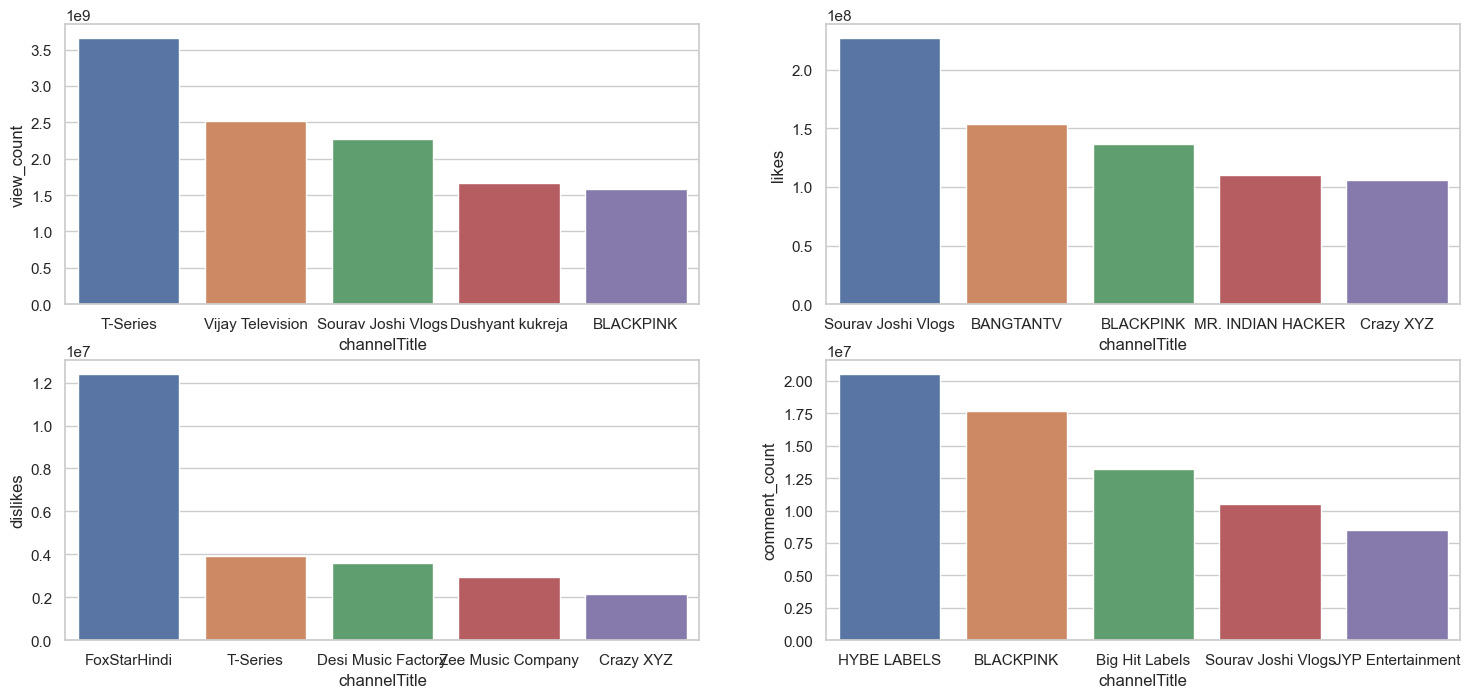

In [32]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink. 

#Most Watched Category

In [33]:
category_group_df = df.groupby(by = df['Video_Category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Anime/Animation,23936,3482502838,104359978,2254845,5221882,3,2
Autos & Vehicles,897,2917790934,94689221,3255250,4240977,5,5
Classics,6118,563982994,41327903,327773,1317236,2,1
Comedy,104940,35250173074,1855464728,37911989,180927951,18,62
Drama,167486,20668324845,1315410304,11837539,31107139,91,192
Family,77579,9904109894,669315492,7535813,18496941,24,31
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105
Horror,39475,1541970716,29470756,3153409,3034702,70,144
Music,550,421685808,20910828,427127,419151,1,2


In [34]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Foreign,453240,48069360287,2039481608,49099525,62906849,157,105


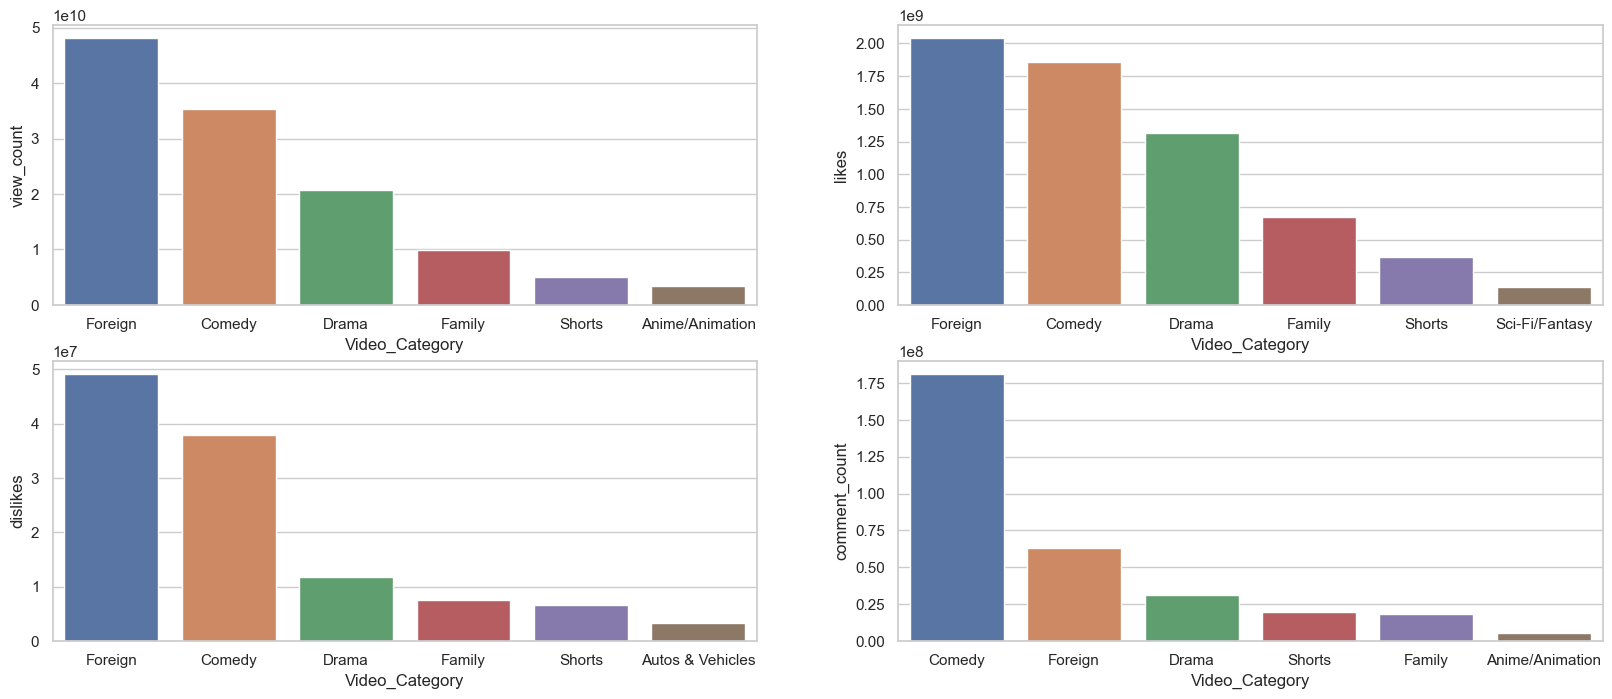

In [35]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

#Least Watched Category

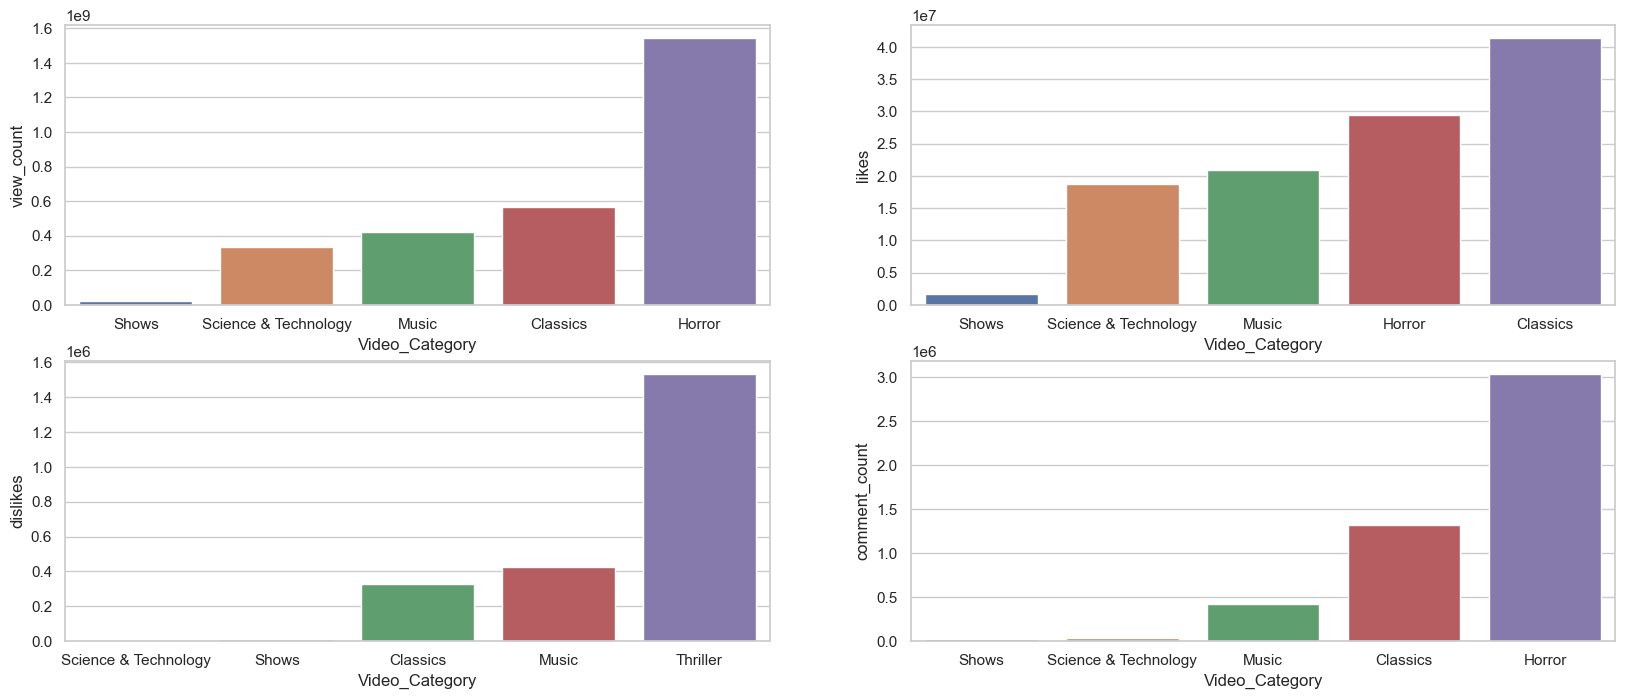

In [36]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1) 
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

**Shows** are the least watched category and least like as well

##Follow up Analysis

But is that right way of analysis?

1. Dislikes would be more as there are more views. Shouldn't we consider the percentage ?
2. Does highest views say that the public are highly interested in watching those Category videos?

Let's dive deep further to understand even more



Usually, In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [56]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)



df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,176845011,0.512282
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,3398208,0.134775


#Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

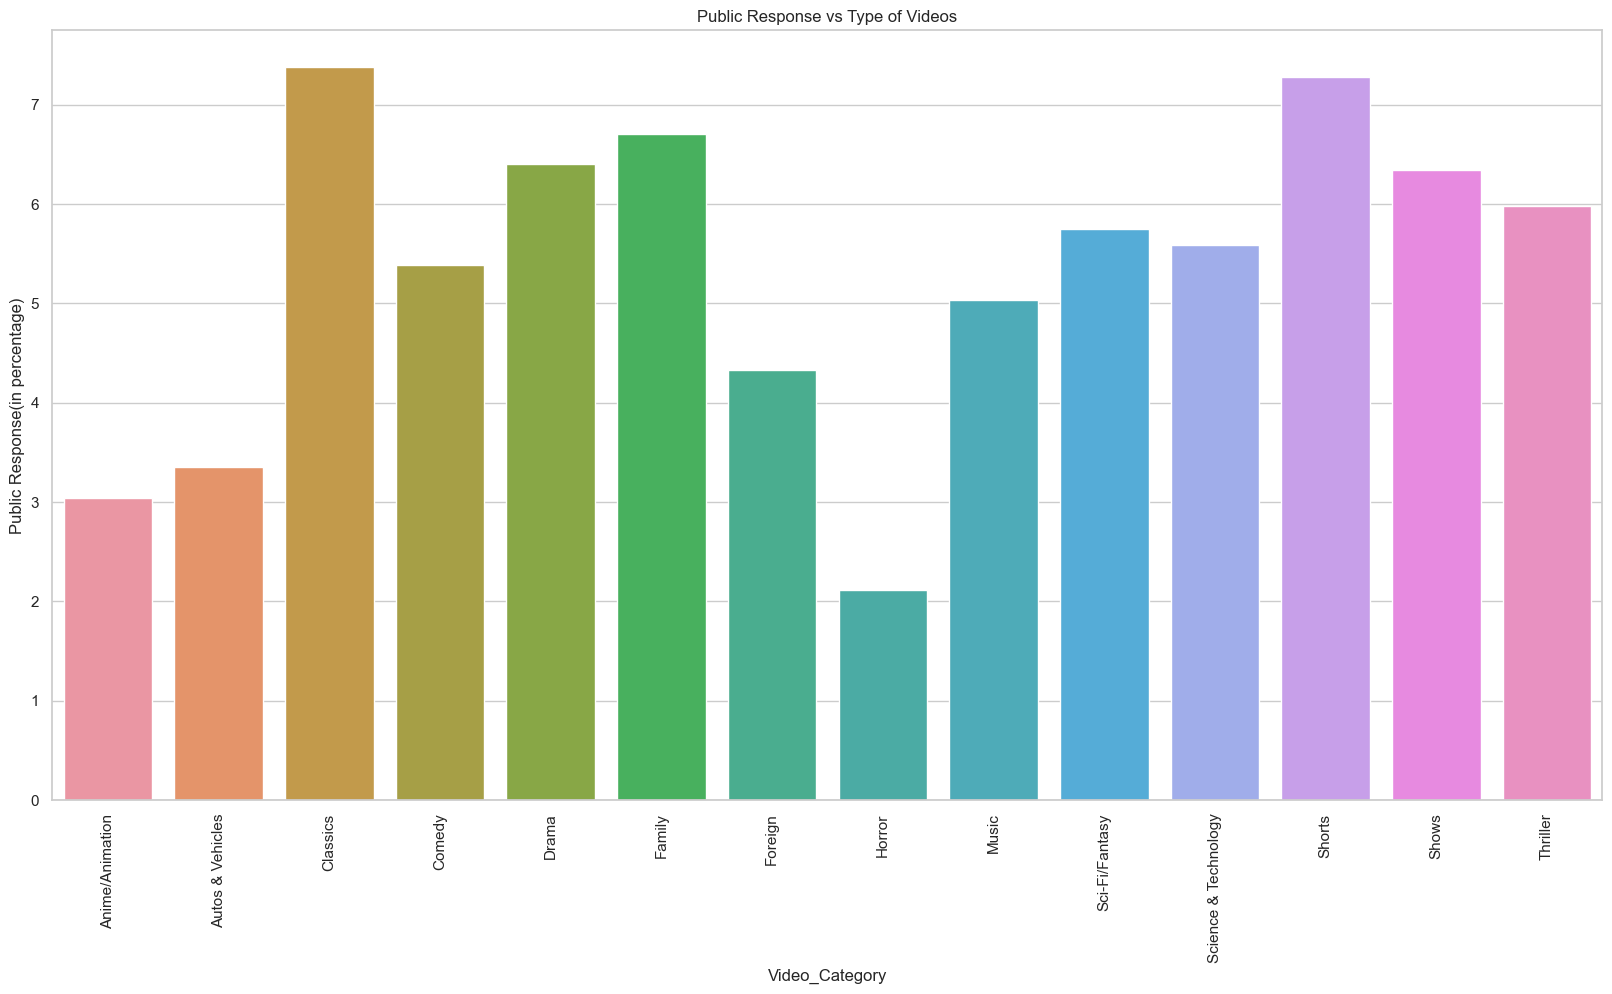

In [38]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

So now, We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos. 

Let's randomly see what those videos are:

In [39]:
df_maxViews[df_maxViews.Video_Category.isin(["Sports", "Classics"])].sample(20)


,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
33943,b4MkDSRLY3E,Aju Varghese നെ ആയിട്ട് ചൂണ്ട ഇടാൻ പോയി!! Fish...,2021-02-10T11:30:09Z,Fishing Freaks,19,2021-02-13T00:00:00Z,kerala|fishing|traditional|kerala fishing|snak...,1180037,130441,1365,5679,False,False,Special thanks to:Collabo Digital Networkhttps...,Classics
40783,7EFRpaainVg,അങ്ങനെ കല്യാണവും കഴിഞ്ഞു 😍| dream rider280 wed...,2021-03-17T13:02:15Z,Dream rider280,19,2021-03-21T00:00:00Z,[None],381754,23837,795,1918,False,False,ആഗ്രഹിച്ചപോലെ wedding anniversary അടിച്ചു പൊളി...,Classics
96712,QoB5JqiM5cE,The Sneaky Food Trap,2021-12-27T07:15:01Z,Nas Daily,19,2022-01-01T00:00:00Z,Nas Daily|Nasmeanspeople|1minute|Travel|Nuseir...,10848547,936518,0,16574,False,False,#shorts,Classics
62430,naAt7FRI3Og,Amazing Street Food Breakfast | South indian B...,2021-07-06T10:45:25Z,Street Byte,19,2021-07-08T00:00:00Z,Street Byte|Street food|Indian food|Street foo...,195326,6422,156,344,False,False,If you're ever near the RTO office at Kukkatpa...,Classics
59876,TYrXizEVBEM,കുട്ടി റൈഡർ എത്തി😍.....,2021-06-20T15:59:15Z,Dream rider280,19,2021-06-24T00:00:00Z,DREAM RIDER 280|KERALA VLOG|KERALA TRAVEL VLOG...,404839,32202,339,3744,False,False,send your requirements to our marketing teamSe...,Classics
121393,WNGKpdz4XTg,വണ്ടി ഞങ്ങളുടെ കൈകളിലേക്ക്,2022-05-04T15:35:00Z,E BULL JET,19,2022-05-06T00:00:00Z,[None],470098,63428,0,2692,False,False,home location Dropped pinhttps://maps.app.goo....,Classics
135392,XtOXUkxn-f8,Honda City Hybrid 2022🚗🚘|#shorts #tamil,2022-07-13T12:30:14Z,Cheran Academy,19,2022-07-16T00:00:00Z,[None],724919,64301,0,259,False,False,NaN,Classics
42309,Hm4OB6Akla8,Jathi Ratnalu | Anudeep - Ravi candid Counters...,2021-03-25T12:05:44Z,Street Byte,19,2021-03-29T00:00:00Z,Mixed biryani|Biryani|Chicken biryani|3 states...,719572,19422,723,1184,False,False,Powered by: “ Oceana Positive “: Oceana positi...,Classics
138163,PVuAJL0BtW4,#miniglovevlog Day 12 “Mach mach nhi krne ka h...,2022-07-29T01:30:04Z,LittleGlove,19,2022-07-30T00:00:00Z,[None],3894948,253160,0,298,False,False,NaN,Classics
32252,NsLUIpZXMVg,ചിന്നുവിനെ മൊത്തത്തിൽ മാറ്റി 😍| save the date ...,2021-01-31T12:30:48Z,Dream rider280,19,2021-02-03T00:00:00Z,[None],231396,11875,386,624,False,False,ചിലകാര്യങ്ങൾ ആവശ്യങ്ങൾക് നടക്കില്ല ആഗ്രഹിക്കുമ...,Classics


Let's create Similar Percentages and see what they infer

In [57]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,162,0.000005
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,3485,0.000121
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,4425,0.000794
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,5250,0.000015
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,638,0.000003
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,12537,0.000129
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,4378,0.000009
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,6906,0.000450
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,12758,0.003138
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,254584,0.010097


<AxesSubplot: xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

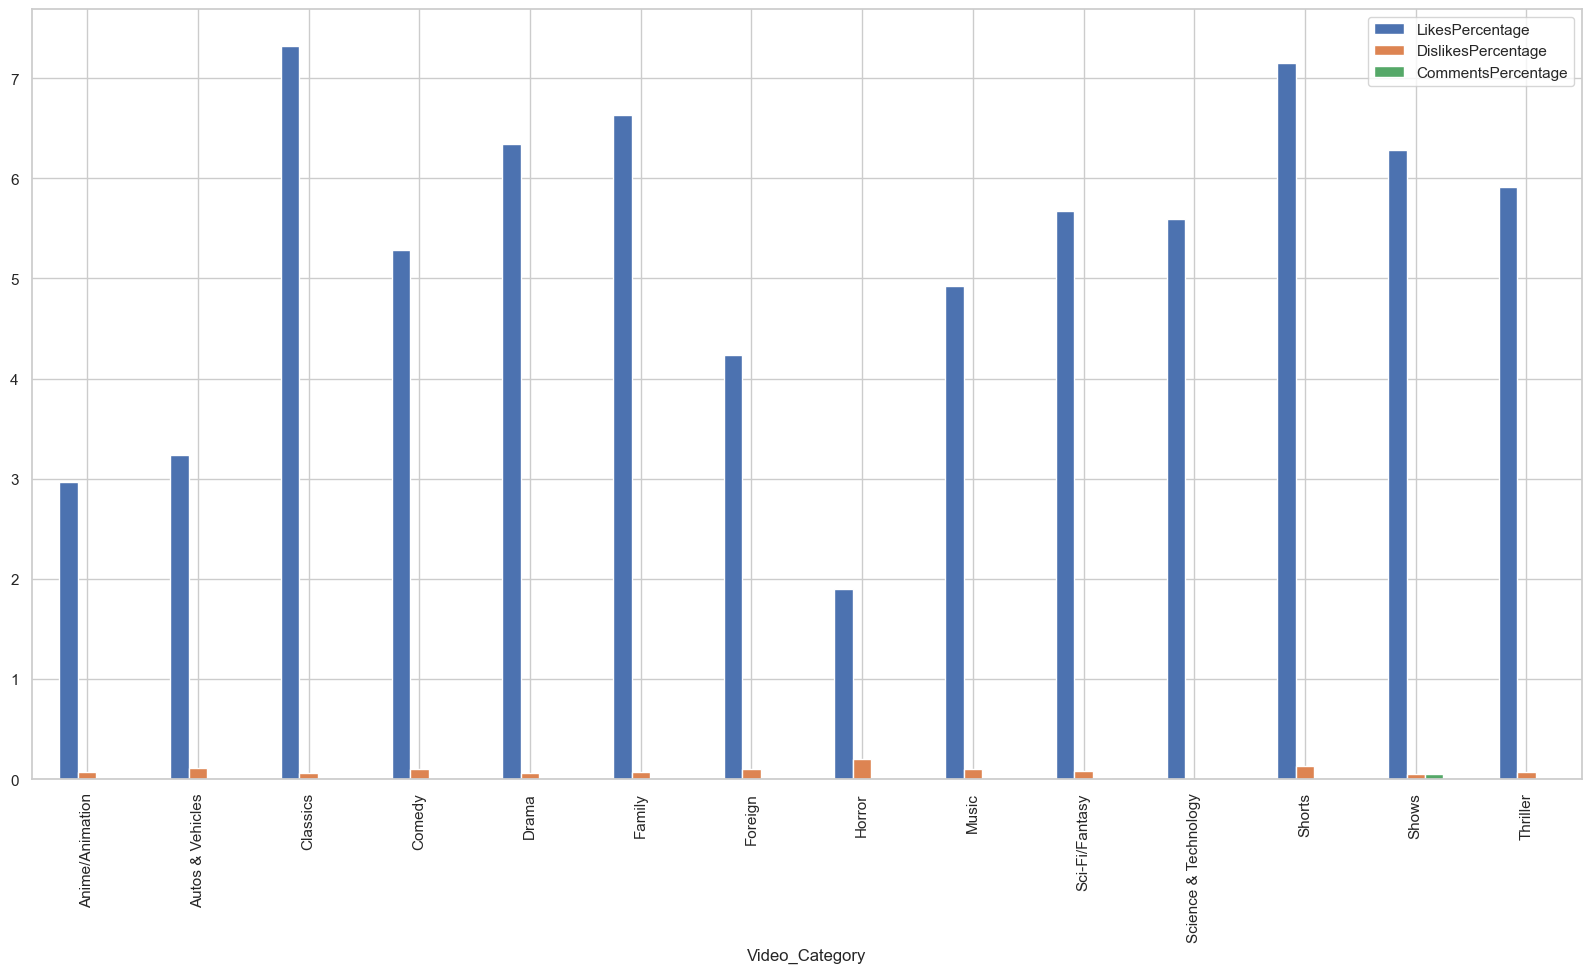

In [58]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

#CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

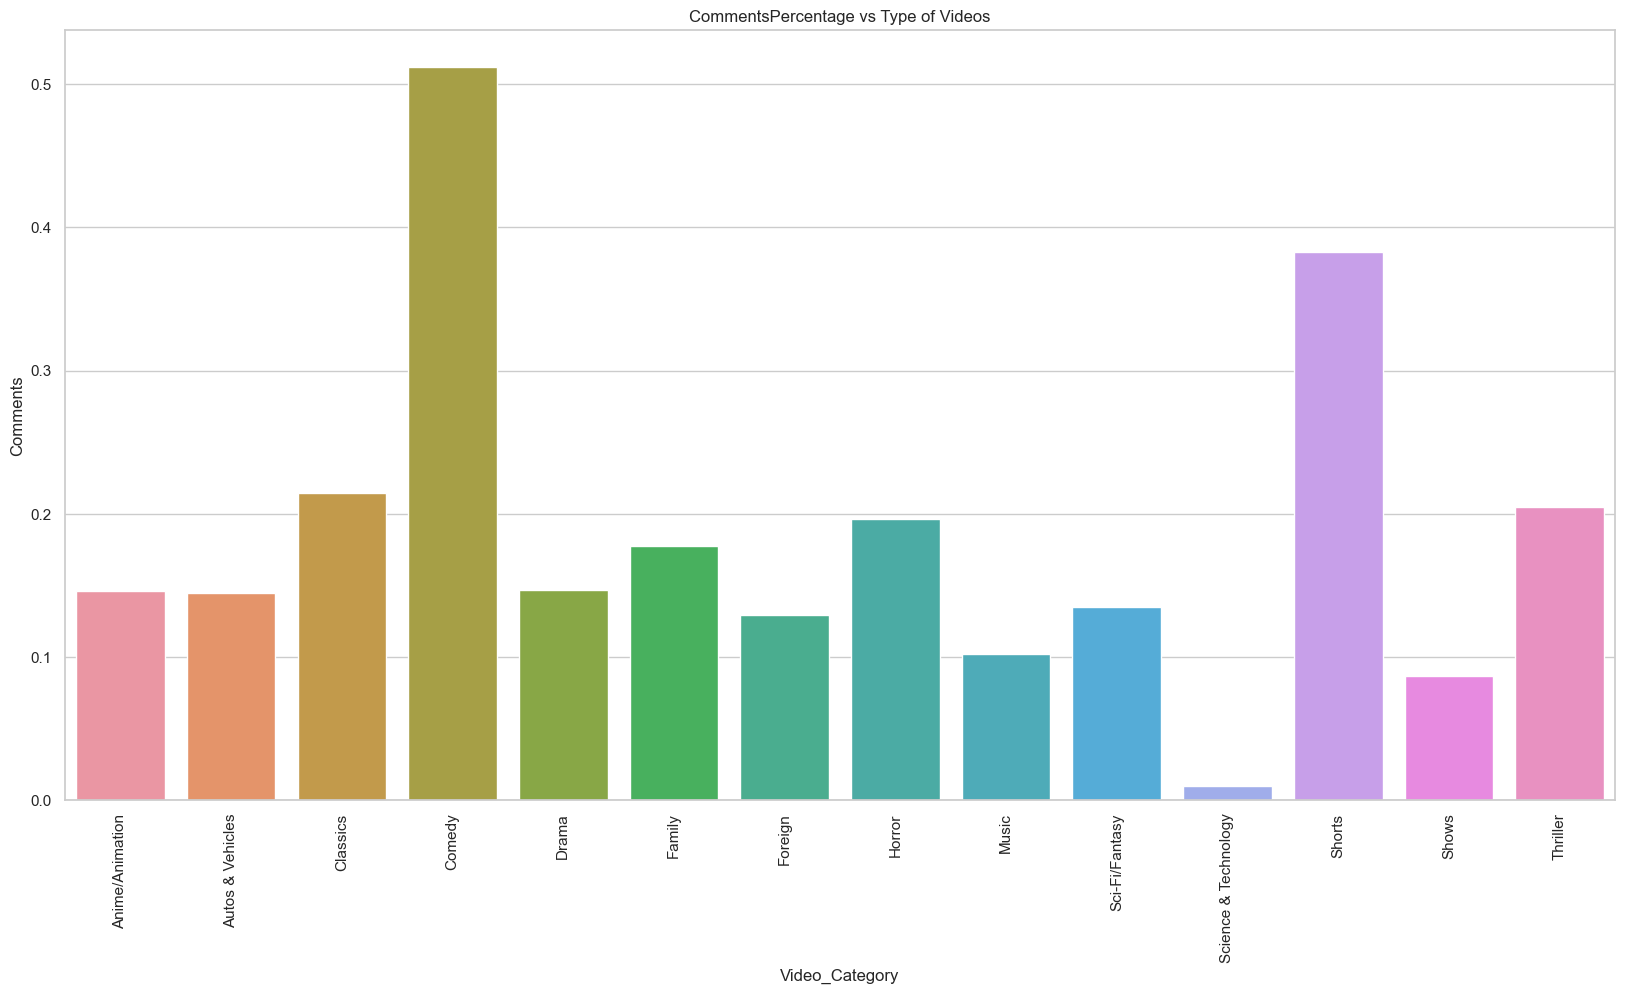

In [42]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

Comedy and Shorts has the most comments.

Text(0, 0.5, 'Dislikes')

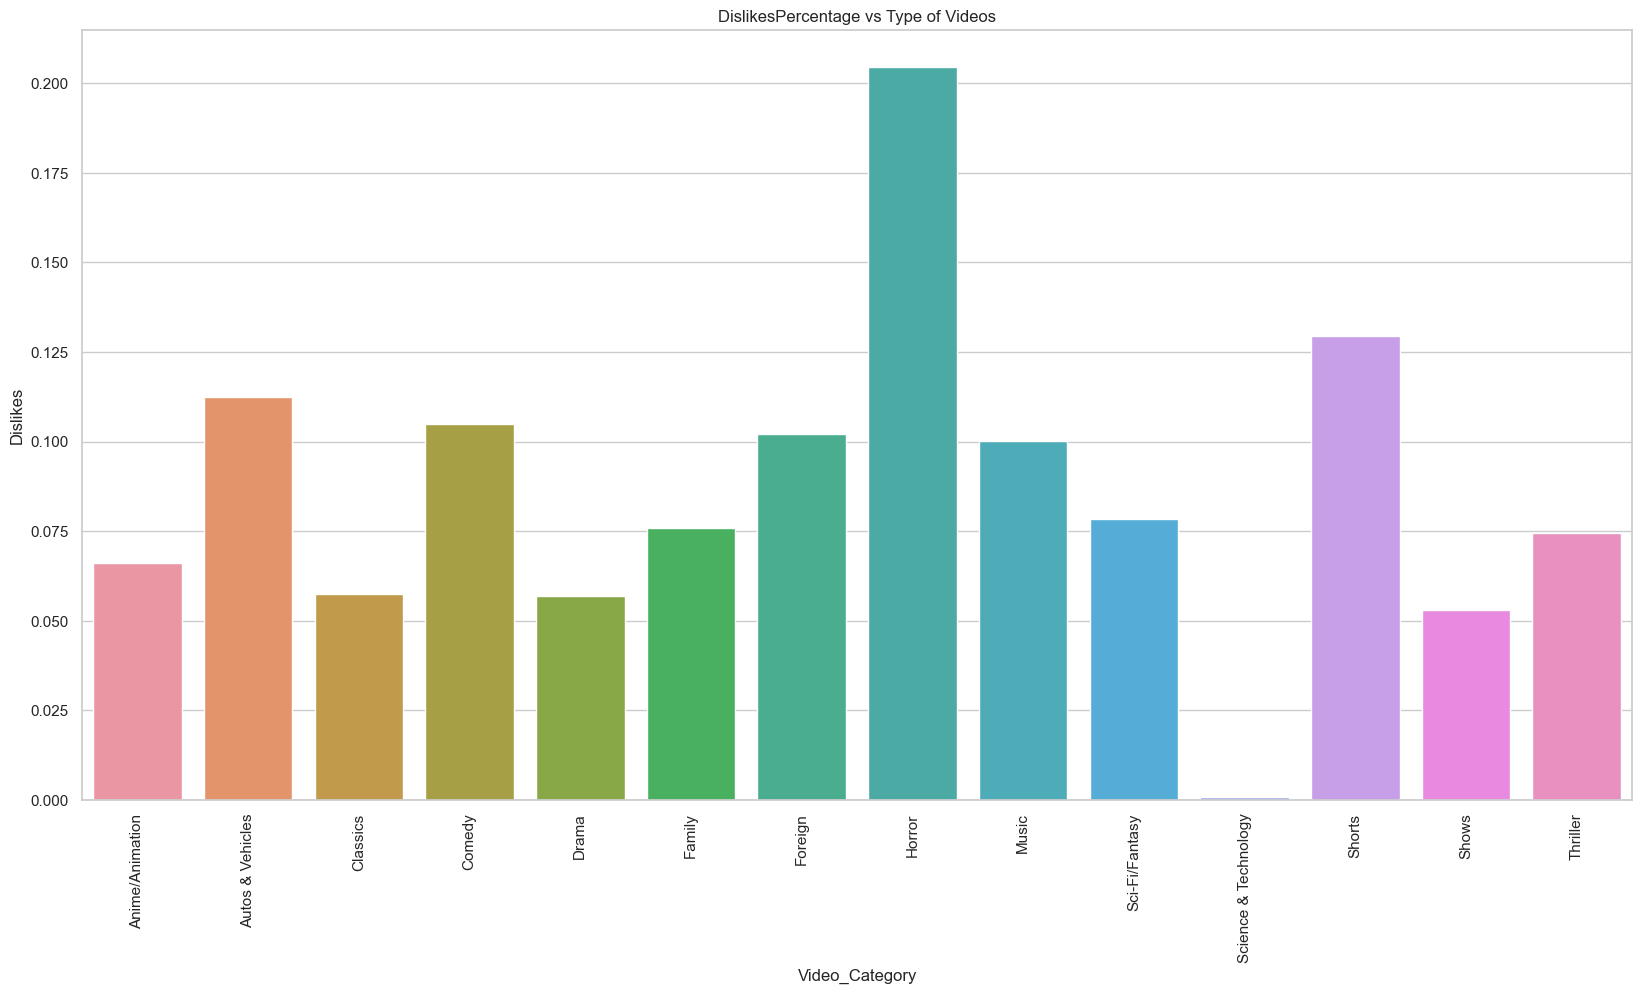

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

**Horror** movies seems to receive the most dislikes

#LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

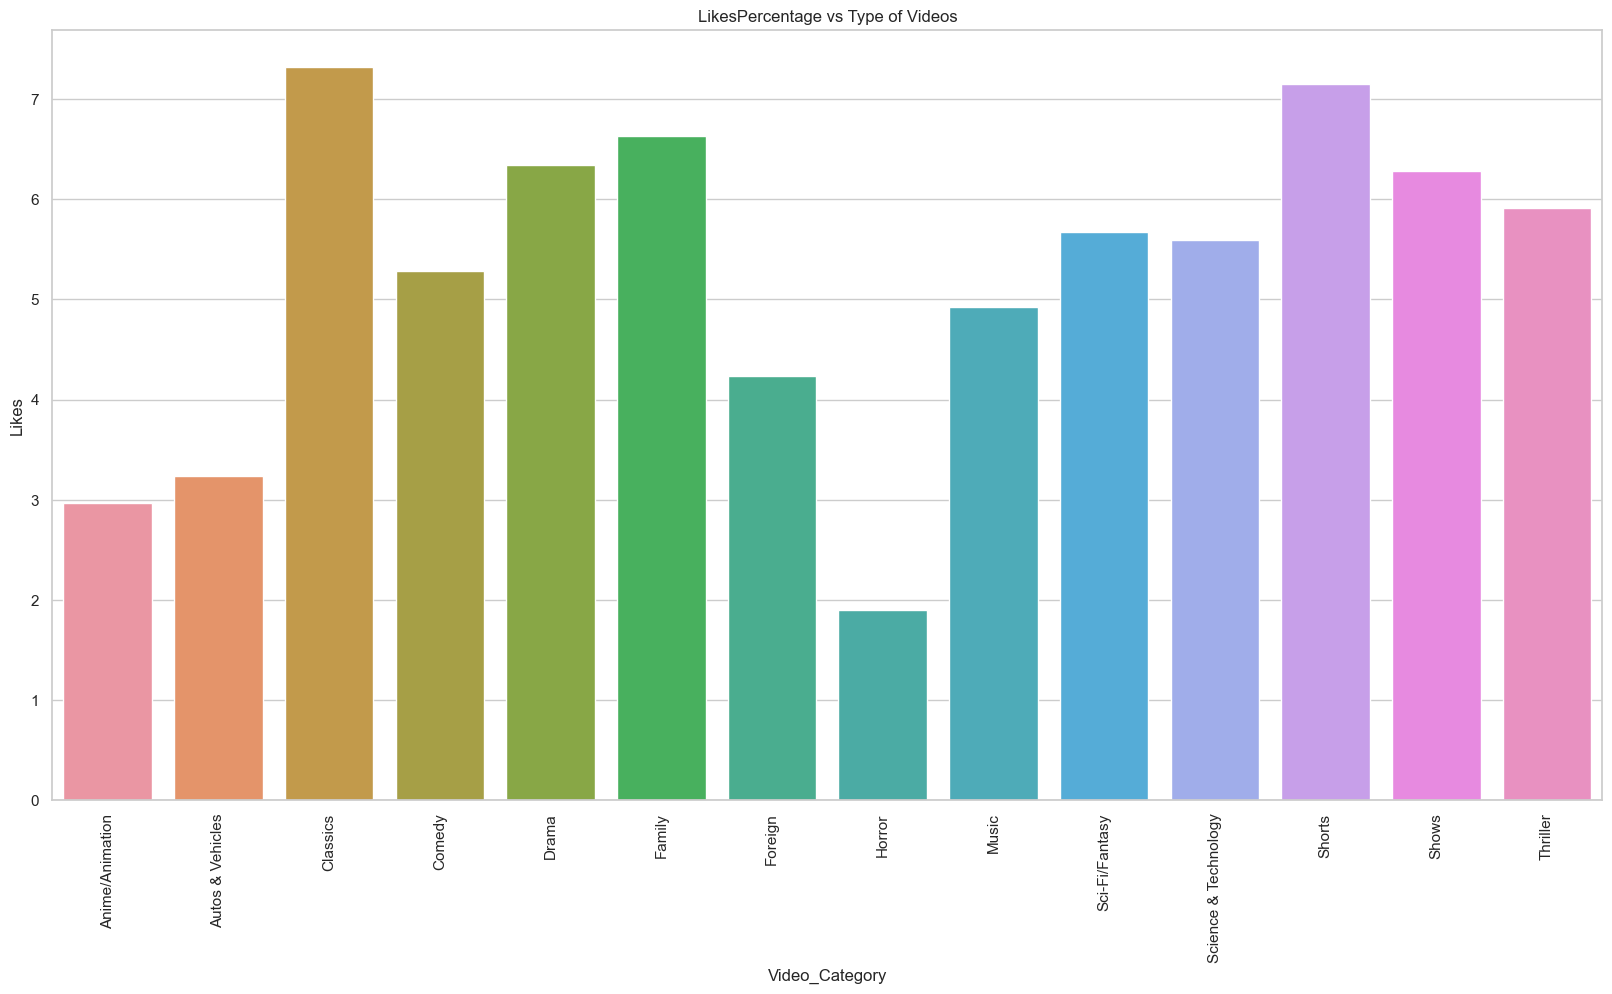

In [44]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

**Classics, Shorts** and **Family** movies seems to receive the most likes

<br>

#Channel Analysis

In [45]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
2571,RasiganinRasigan,6316690,0,0,1784
2333,Pakistan Super League,10339896,272562,8892,6018
201,Alia Bhatt,1000911,64707,6477,4113
2422,Prime Video India,42557241,309587,0,30920
757,DD News,11209896,250646,14143,0
246,Amma Kai Pakkuvam,1336755,49419,0,3953
91,AMAAN-T,3814252,69529,0,4768
2481,RI VLOGS SHORTS,4387552,121618,10830,3782
1982,Modern Monkey,223604,3919,586,244
2146,Nanthu6624,3095962,177518,0,517


In [59]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630604
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


#Channel vs total views

Text(0, 0.5, 'Total Views')

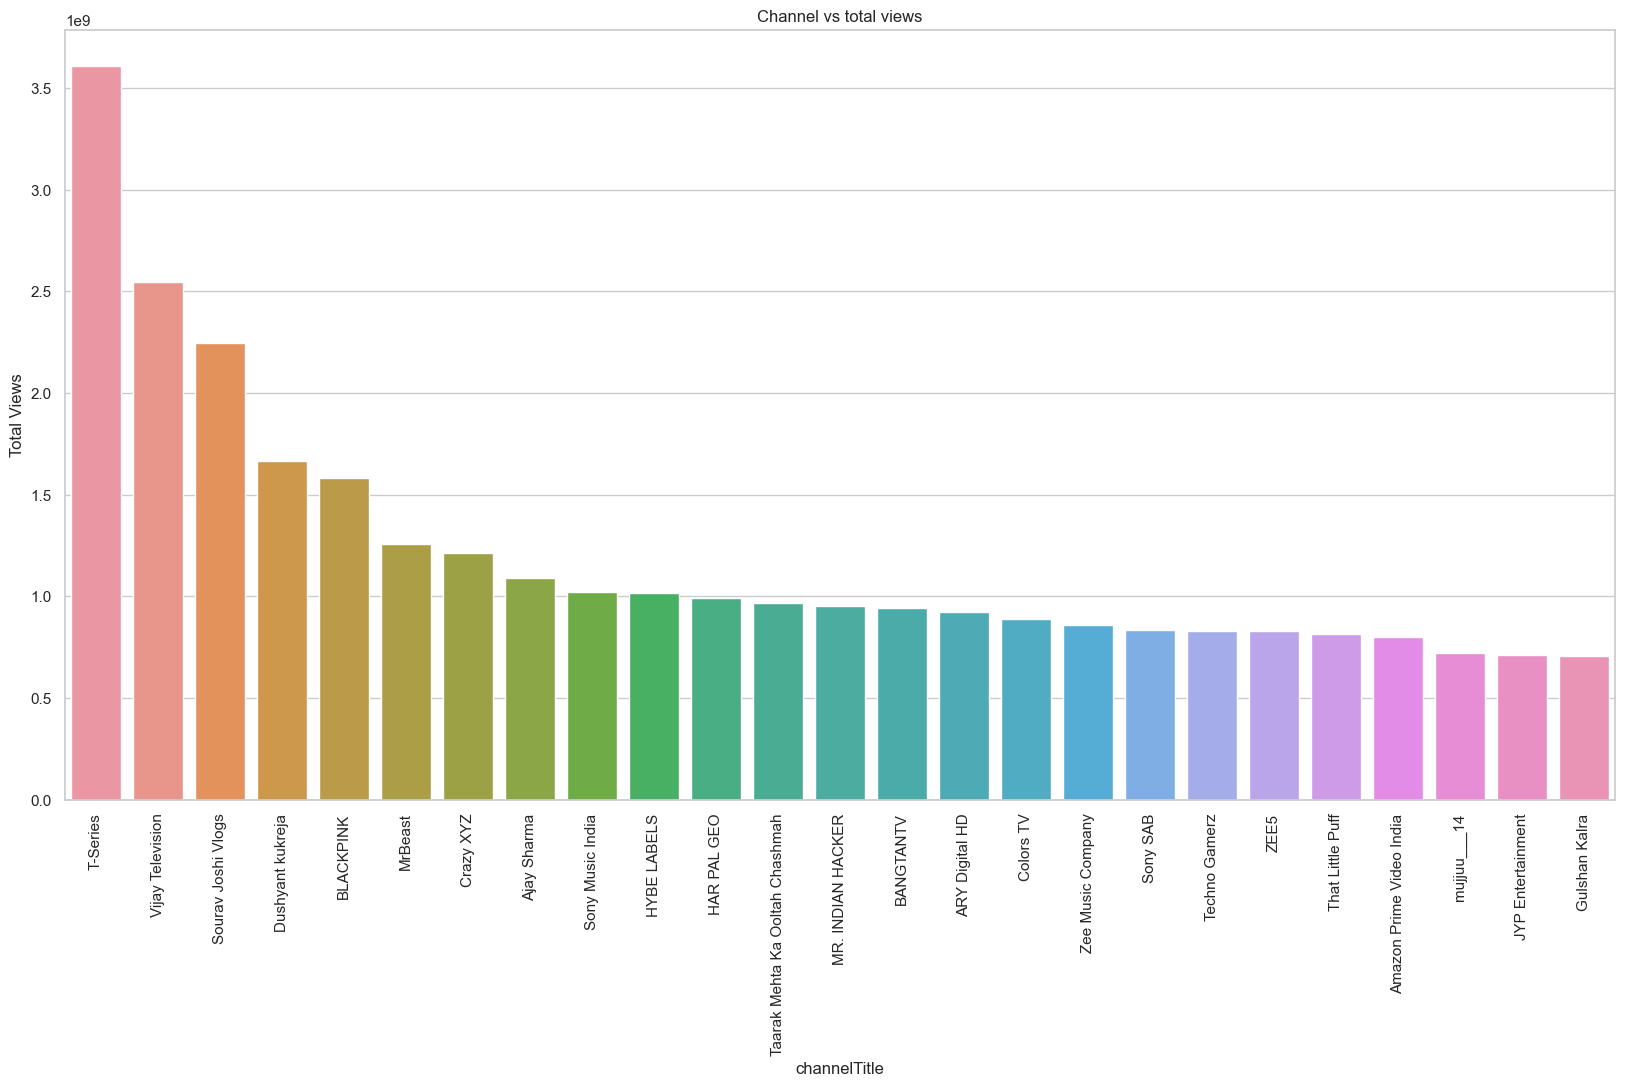

In [47]:
Channel_Views = df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total views")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.view_count)

# Add label for vertical axis
plt.ylabel("Total Views")

#Channel vs total Likes

Text(0, 0.5, 'Total Likes')

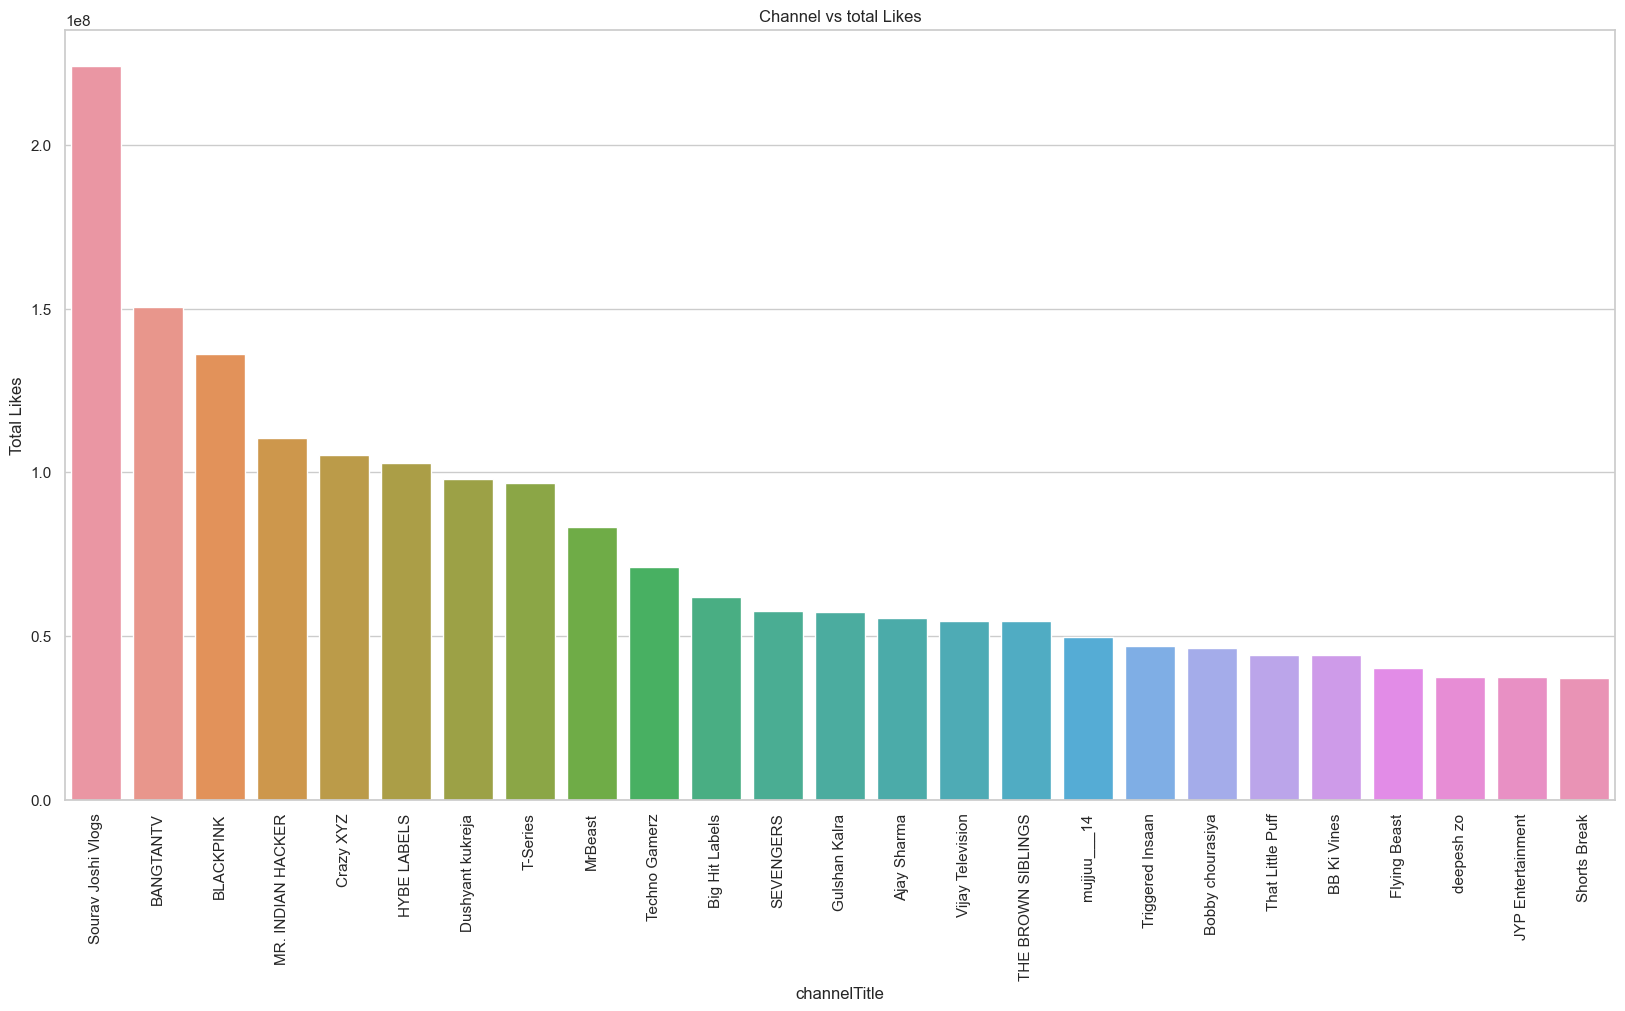

In [48]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


#Channel vs total Comments

Text(0, 0.5, 'Total Comments')

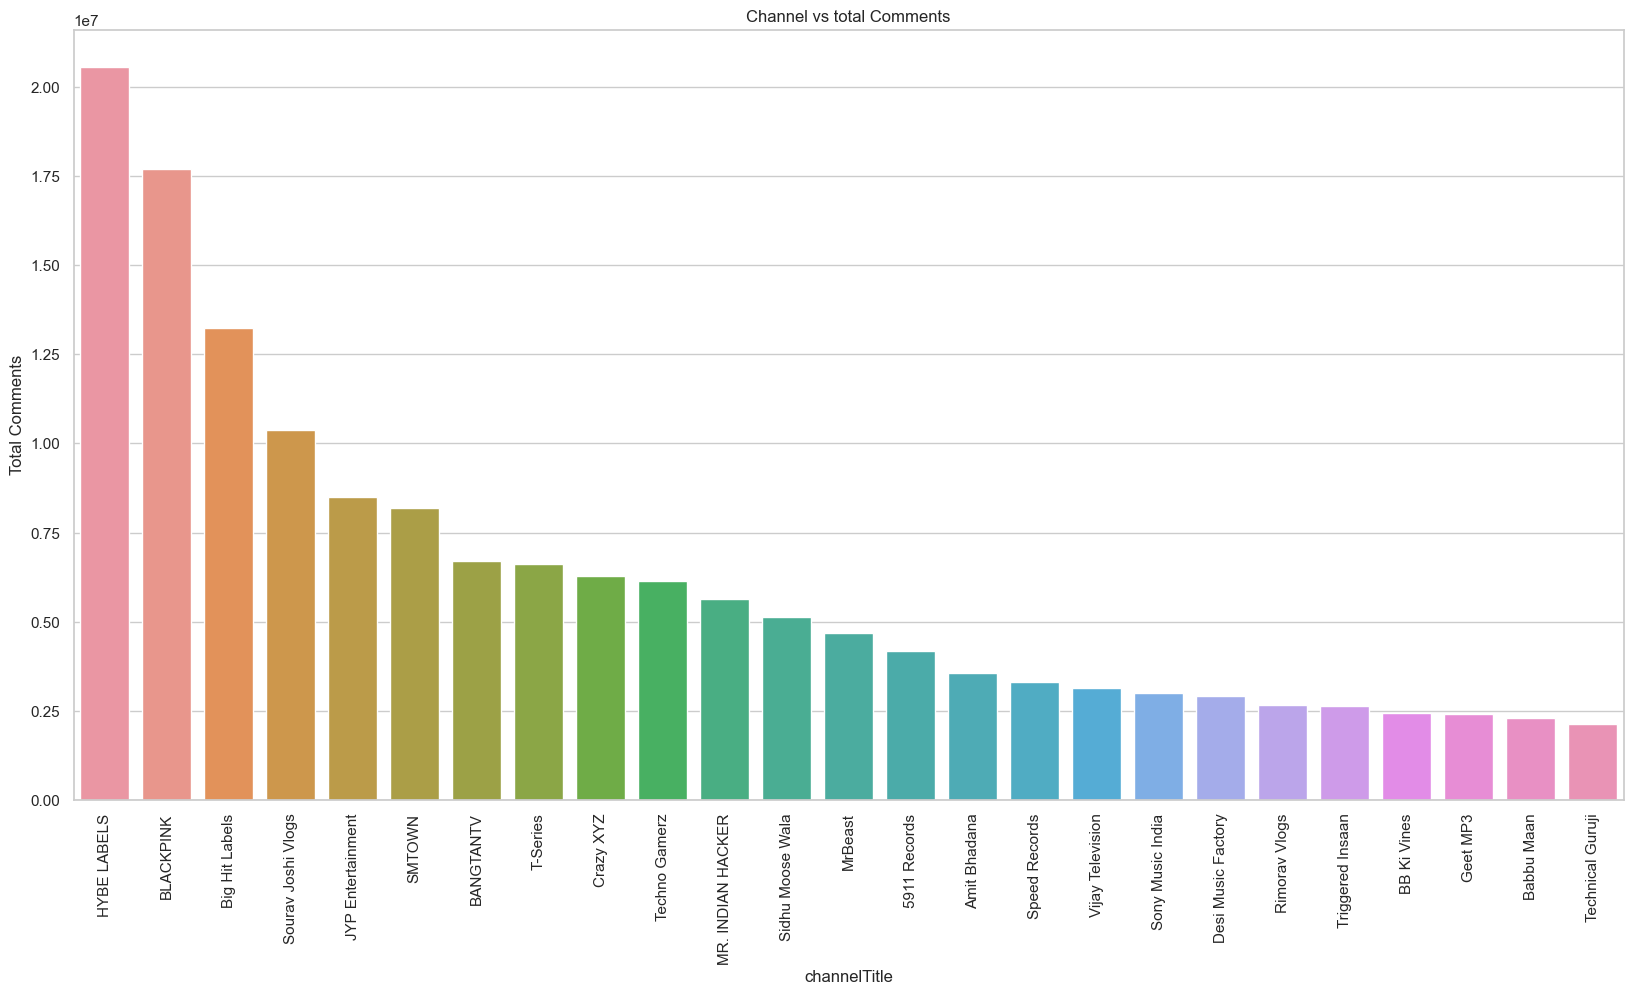

In [49]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

<br>

##Let's try some different analysis now

In [50]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

{'--9rRxqTdjQ': 1,
 '--GS_EPuuMc': 1,
 '--L_wDHUaxY': 1,
 '--WGlFF6-yw': 1,
 '--vmXGvtqxQ': 1,
 '--xmP5nOoLM': 1,
 '-00zRvr9zyA': 1,
 '-05Hay2JrKg': 1,
 '-0Da_UPrV10': 1,
 '-0PR_BkK60E': 1,
 '-0Qa7hB2vXI': 1,
 '-0SOJVfKX00': 1,
 '-0beFQnB5lY': 1,
 '-0gtaC4AzHA': 1,
 '-0ldvhBlL-k': 2,
 '-0oRa0QXx6I': 1,
 '-0udX1wZ82U': 1,
 '-0wc4B969z0': 1,
 '-13QFm5vAoY': 1,
 '-19EvIcr9ZA': 1,
 '-1EIBWRRj4U': 1,
 '-1ImKHHc7Ck': 2,
 '-1QZHe8x2G0': 1,
 '-1dLG2z61hQ': 1,
 '-1ddUMd4BRw': 1,
 '-1i1gagGtu4': 1,
 '-1kFl7EWFqs': 1,
 '-1lRI4dseeA': 1,
 '-1pQX88fnUQ': 1,
 '-28tVGVeM_Q': 1,
 '-29uvnpHjpI': 1,
 '-2CYiqoM3BA': 1,
 '-2DOCcpdTS0': 1,
 '-2RBOk_RzA0': 1,
 '-2RJTVPSOPc': 1,
 '-2WasASWxgo': 1,
 '-2_qmj_X04o': 1,
 '-2a-DFvWa0k': 1,
 '-2dqKYHewY0': 1,
 '-2draG1JbKA': 1,
 '-3AQa1eM_PU': 1,
 '-3A_ptUS5_g': 1,
 '-3HiGsaH4Ew': 1,
 '-3IcQ3RygGE': 1,
 '-3KzmJPgHu4': 1,
 '-3LbftaK6jM': 1,
 '-3XxzOSIvZ8': 1,
 '-3_fPBahI_0': 1,
 '-3z4u6AHBxg': 1,
 '-3zqU_Z6T3o': 1,
 '-47LcGA8Fp4': 1,
 '-4L_ZLzYdlU': 1,
 '-4escF5itQ

In [51]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

Let's try to find the Channels that have their videos in trending for most of the times.

In [64]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
47972,QWnde02ZTVw,Sivaangi | Cooku with Comali Director Parthiv ...,2021-04-24 14:15:13+00:00,Media Masons,24,2021-04-29 00:00:00+00:00,media masons|media masons sam vishal and shiva...,1072039,64086,578,2845,False,False,Catch the Fun Filled Show with Our Very OwnCoo...,Foreign,1
112043,niktTkjmDjQ,Filmymoji || Middle Class Madhu || Vizag Zoora...,2022-03-17 13:00:12+00:00,Filmymoji,24,2022-03-20 00:00:00+00:00,filmymoji middle class madhu|mcm|filmymoji|fil...,1845536,149007,0,4231,False,False,Filmymoji Middle Class Madhu Vizag Zoorassic P...,Foreign,1
87166,89IE4WBJ0rI,Upgrading Into The STRONGEST HULK In GTA 5!! T...,2021-11-08 05:15:04+00:00,ShivGam Gaming,20,2021-11-12 00:00:00+00:00,shivgam gaming|shivgam|gta 5 shinchan|shinchan...,489357,14029,1224,90,False,False,#shinchangta5 #hulkgta5 #shivgamgamingUpgradin...,Comedy,1
91548,TKEj6SSaaaI,&hit Movies and Hit Songs - Part 2 | Tamil | A...,2021-12-03 10:37:02+00:00,Abhistu,23,2021-12-06 00:00:00+00:00,abhistu|abistu|abhistu channel|abishtu|abhistu...,233962,19972,271,871,False,False,Download Vita App - https://vita.onelink.me/8u...,Family,1
44097,RfVmAGcyb48,Ajjubhai Vs Amitbhai Desi Gamers Best Collecti...,2021-03-31 04:15:03+00:00,Total Gaming,20,2021-04-07 00:00:00+00:00,free fire|garena free fire|total gaming|free f...,9976682,724054,31113,21259,False,False,Ajjubhai Vs Amitbhai Desi Gamers Best Collecti...,Comedy,1


Top 25 Videos that are in trending for many days

In [65]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
18951,fH53um9coSk,Keh Len De | Kaka | New Punjabi Songs 2020 | F...,2020-11-12 07:50:25+00:00,Single Track Studio,10,2020-11-20 00:00:00+00:00,Punjabi Songs|Latest Punjabi Songs|Pollywood|A...,12792140,387957,8818,19567,False,False,#KehLenDe #KaKa #LatestPunjabiSongs2020 #NewPu...,Comedy,5
57594,vA8h5OxKkQ4,distributing masks made with money😮,2021-06-09 05:25:00+00:00,Harsha Sai - For You,24,2021-06-14 00:00:00+00:00,#telugu #harshasai,895951,92627,1072,6192,False,False,"subscribe @Harsha Sai - For You , I might call...",Foreign,5
102223,d9gQhno4VjE,Becoming a Professional Instagram Reeler!?? | ...,2022-01-23 07:00:10+00:00,Triggered Insaan,23,2022-01-29 00:00:00+00:00,triggered insaan|live insaan|funny|comedy|reel...,4965170,770478,0,33879,False,False,I Joined a new Age Content Agency to become a ...,Family,4
139594,pkQqC51oykg,Crafting Most Epic Rocket Shoes to FLY in Mine...,2022-08-02 07:45:06+00:00,Carry Depie,20,2022-08-06 00:00:00+00:00,minecraft|minecraft java edition|minecraft hin...,918513,29432,0,1389,False,False,in this video i am buying most epic shoes in m...,Comedy,4
66563,WPX7Ab-yQfY,Funniest Things People Actually GOOGLE About M...,2021-07-26 07:00:44+00:00,Triggered Insaan,23,2021-07-29 00:00:00+00:00,triggered insaan|live insaan|qna|funny|answeri...,4829268,704172,8692,39464,False,False,Today I am roasting myself in form of a QNA vi...,Family,4
78016,4J0pg1LmhQg,Mehendi - Song| Dhvani Bhanushali | Gurfateh| ...,2021-09-21 06:00:16+00:00,Dhvani Bhanushali,10,2021-09-27 00:00:00+00:00,mehendi|dhvani bhanushali|dhvani|vaaste|navrat...,27927728,807538,42031,43017,False,False,Vinod Bhanushali presents Dhvani Bhanushali’s ...,Comedy,4
138607,e3TYWx7HqLM,Big Brain Among Us Shapeshifter Impostor Plays,2022-07-28 09:00:32+00:00,Live Insaan,20,2022-08-01 00:00:00+00:00,Triggered Insaan|Live Insaan|funny|comedy|amon...,1432378,129074,0,4146,False,False,Today we are playing Among Us again since the ...,Comedy,4
37206,Cepo69WEr88,New Hindi Songs | Pawri (Party) Ho Rai Hai | P...,2021-02-24 05:29:15+00:00,Desi Junction,10,2021-03-02 00:00:00+00:00,New Hindi Songs|Danish Alfaaz|Muskaan Sharma|D...,4169665,150125,33076,7146,False,False,Desi Junction & Jassi Lohka Presents Pawri (P...,Comedy,4
53515,VsMR_RDpX7k,YEH SAALI AASHIQUI | When You're In Love With ...,2021-05-29 08:57:27+00:00,So Effin Cray,24,2021-06-03 00:00:00+00:00,so effin cray|so effin cray latest|so effin cr...,697960,62747,1820,2374,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Foreign,4
145425,LtW_18xtcM8,100 ZOMBIE KING VS BEST Defense Base in Min...,2022-09-01 04:00:07+00:00,Adi-Spot,20,2022-09-04 00:00:00+00:00,Adispot|Adi-Spot|adispot|adispoot,527418,28584,0,737,False,False,100 ZOMBIE KING VS BEST Defense Base in Min...,Comedy,3


<br>

Top Channels whose video is in trending for most of the times

#Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

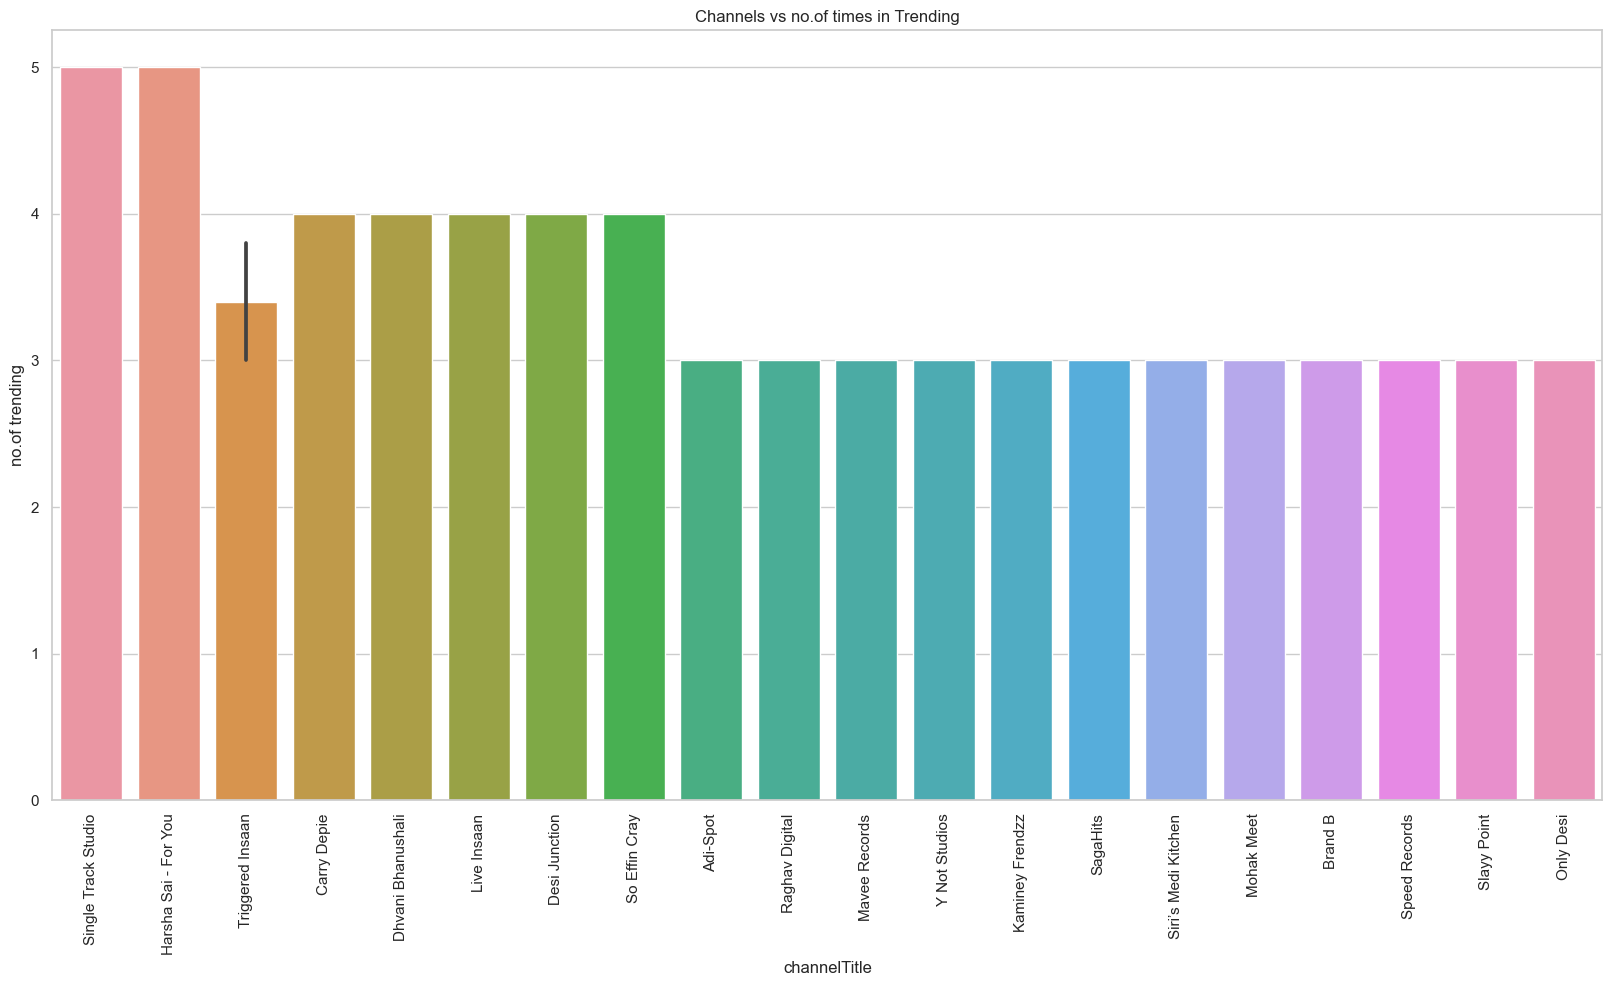

In [66]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

<br>


Top 30 Channels whose Videos are in Trending

In [67]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending 

,channelTitle,times_in_trending,Majority_Videos_Category_Type
3624,Vijay Television,949,Foreign
698,Colors TV,844,Foreign
3783,ZEE5,538,Foreign
374,Asianet,486,Foreign
697,Colors Rishtey,484,Foreign
3015,Sony SAB,453,Foreign
3027,Sourav Joshi Vlogs,441,Drama
726,Crazy XYZ,393,Shorts
3238,Taarak Mehta Ka Ooltah Chashmah,285,Foreign
1781,MR. INDIAN HACKER,248,Shorts


# Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

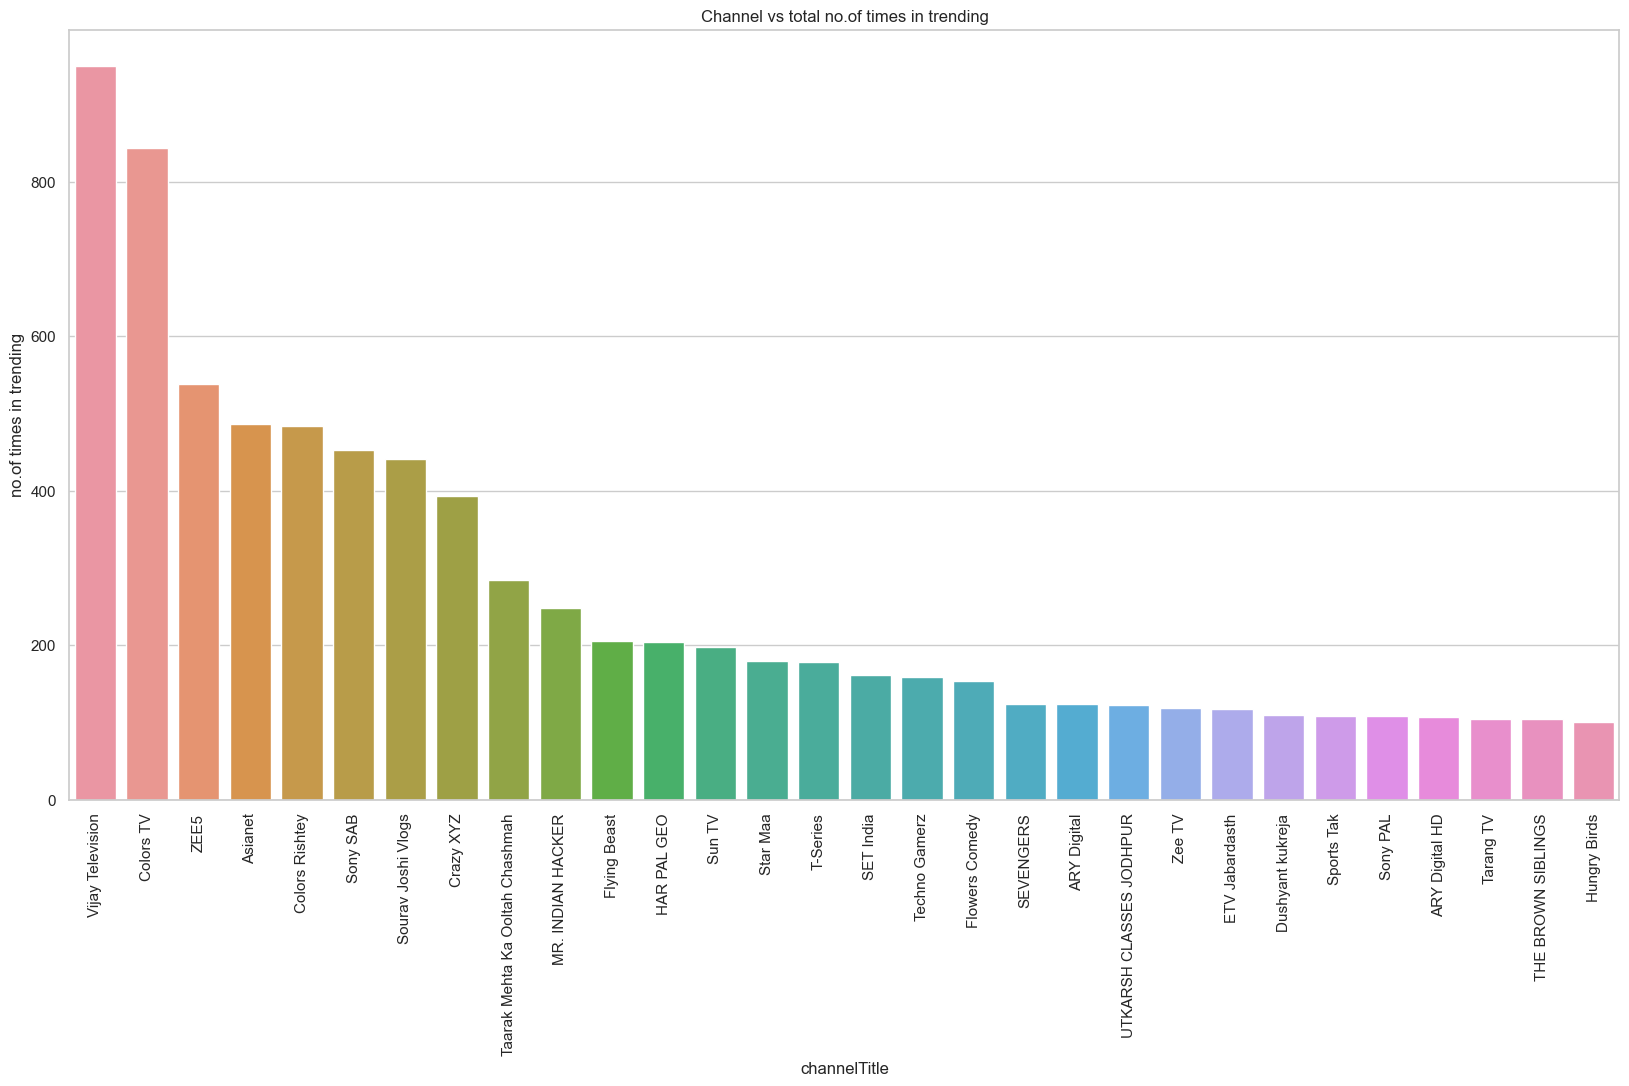

In [68]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Category of the Videos Uploaded of Top Channels which are in Trending

#Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

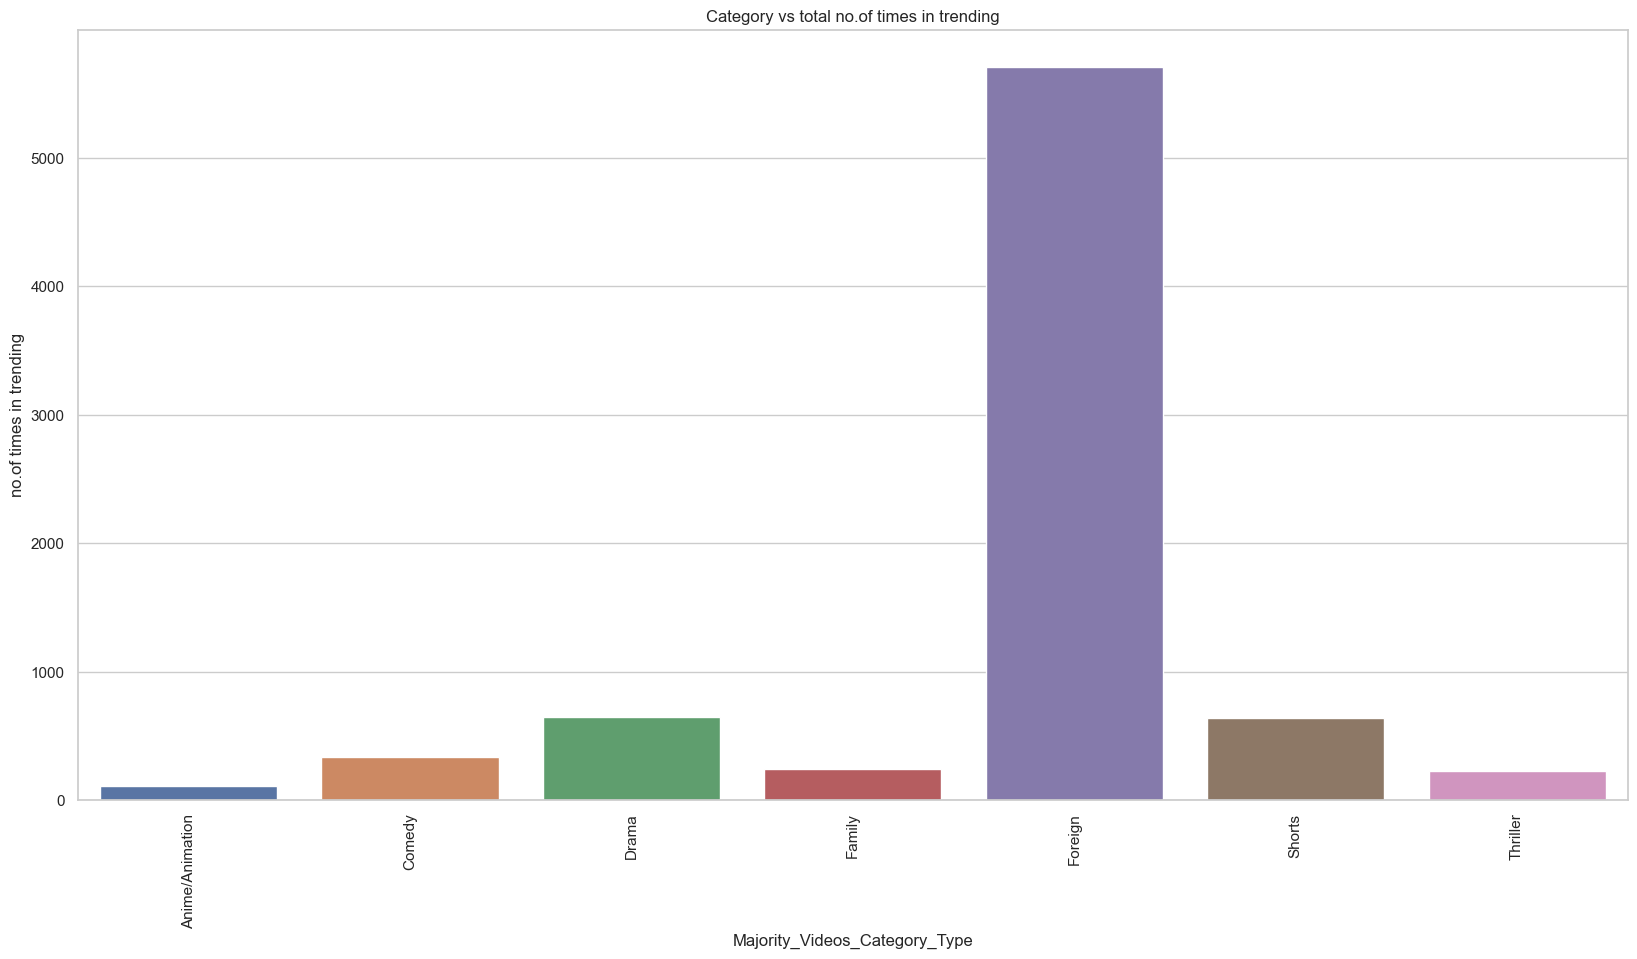

In [69]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<br>

Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [70]:
df_minViews.trending_date

47639    2021-04-27T00:00:00Z
74296    2021-09-09T00:00:00Z
98148    2022-01-09T00:00:00Z
17317    2020-11-11T00:00:00Z
2760     2020-08-26T00:00:00Z
                 ...         
60487    2021-06-29T00:00:00Z
51371    2021-05-21T00:00:00Z
27368    2021-01-08T00:00:00Z
63673    2021-07-15T00:00:00Z
55573    2021-06-09T00:00:00Z
Name: trending_date, Length: 46294, dtype: object

In [71]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) #\s means matches "any whitespace character"
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
102541,llircILJG20,மூளை யை யாருமே இப்படி Use பண்ணிருக்க மாட்டாங்க...,2022-01-30T06:30:06Z,Vinoth Seetha,22,2022-01-31T00:00:00Z,[None],2074842,119157,0,366,False,False,Please Subscribe Keep SupportingJoin Us On 👇👇👇...,Drama,2022-01-31 00:00:00+00:00,2022-01-30 06:30:06+00:00,0
115467,VxjeFbnrYA0,ஏன்யா ஸ்கூல்க்கு போற பொண்ணுங்க கையை புடிச்சி இ...,2022-04-06T10:36:28Z,Ayngaran,24,2022-04-07T00:00:00Z,kalavaadiya pozhuthugal songs|kalavaadiya pozh...,2062398,118922,0,242,False,False,Kalavaadiya Pozhuthugal (English: Stolen Momen...,Foreign,2022-04-07 00:00:00+00:00,2022-04-06 10:36:28+00:00,0
48366,aV7XSPqurkY,अगर आपका गला बाहर निकला हुआ हो तो उसका क्या मत...,2021-05-01T14:30:22Z,GetsetflySCIENCE,28,2021-05-02T00:00:00Z,Adam's apple|South Africa|Father Chris Penelop...,384835,37577,894,3170,False,False,CoinDCX link - https://bit.ly/3gBKBVDHello fri...,Shorts,2021-05-02 00:00:00+00:00,2021-05-01 14:30:22+00:00,0
10536,Uj6hDJvFV-0,Varmaa Movie Review by Filmi craft Arun | Bala...,2020-10-06T04:21:58Z,Filmi craft,24,2020-10-06T00:00:00Z,Varmaa movie review|Varmaa review Tamil|Varmaa...,63754,2940,105,312,False,False,#VarmaaReview#VarmaaMovieReview#Varmaa#BalasVa...,Foreign,2020-10-06 00:00:00+00:00,2020-10-06 04:21:58+00:00,0
135806,_BSu6CrZkYY,"Hardik Pandya: Rishabh Pant is special for us,...",2022-07-17T18:59:35Z,Sports Tak,17,2022-07-18T00:00:00Z,sports tak|sportstak|sports|sports events|cric...,351833,13992,0,248,False,False,"Win first prize 1 crore, Download My11circle -...",Anime/Animation,2022-07-18 00:00:00+00:00,2022-07-17 18:59:35+00:00,0
80315,bucyXq4q77c,IND v BAN | 2016 T20WC | Hindi Highlights,2021-10-09T03:30:10Z,ICC,17,2021-10-09T00:00:00Z,[None],212955,10559,305,715,False,False,NaN,Anime/Animation,2021-10-09 00:00:00+00:00,2021-10-09 03:30:10+00:00,0
40459,xqjLIyPwXm8,Bhide हुआ Online Classes से परेशान-Taarak Meht...,2021-03-19T15:30:03Z,Sony SAB,24,2021-03-20T00:00:00Z,तारक मेहता|Ooltah Chashmah|sab tv channel|sab ...,1316441,27261,1637,674,False,False,Click here to watch the full episode of Taarak...,Foreign,2021-03-20 00:00:00+00:00,2021-03-19 15:30:03+00:00,0
61358,qWj_eA2JyrU,Kumkum Bhagya | Premiere Ep 1872 Preview - Jul...,2021-07-02T09:25:16Z,ZEE5,24,2021-07-03T00:00:00Z,ZEE5|ZEE5 Original|Web Series 2021|New Web Ser...,2129182,30606,649,610,False,False,Watch tomorrow’s Premiere Episodes of ZEE TV s...,Foreign,2021-07-03 00:00:00+00:00,2021-07-02 09:25:16+00:00,0
44047,rkutt3ed8PQ,Bought ZX10R so not buying NEW HAYABUSA?,2021-04-06T10:30:04Z,JS Films,22,2021-04-07T00:00:00Z,JS Films|Vlogger|youtuber|jaysn|jasminder sing...,628474,69152,700,2234,False,False,Get my favorite Mivi Products:Collar Bluetooth...,Drama,2021-04-07 00:00:00+00:00,2021-04-06 10:30:04+00:00,0
60883,py7E0hiaQzE,BHAI - BEHAN AUR CHOR || THE SHIVAM,2021-06-30T08:58:57Z,The Shivam,24,2021-07-01T00:00:00Z,bhaibehanaurchor|bhaibehankapyar|theshivam|the...,830322,17491,2338,1026,False,False,Download the OctaFX Trading App at https://bit...,Foreign,2021-07-01 00:00:00+00:00,2021-06-30 08:58:57+00:00,0


#Average no.of days took to be in trending

Text(0, 0.5, 'Avg no.of days')

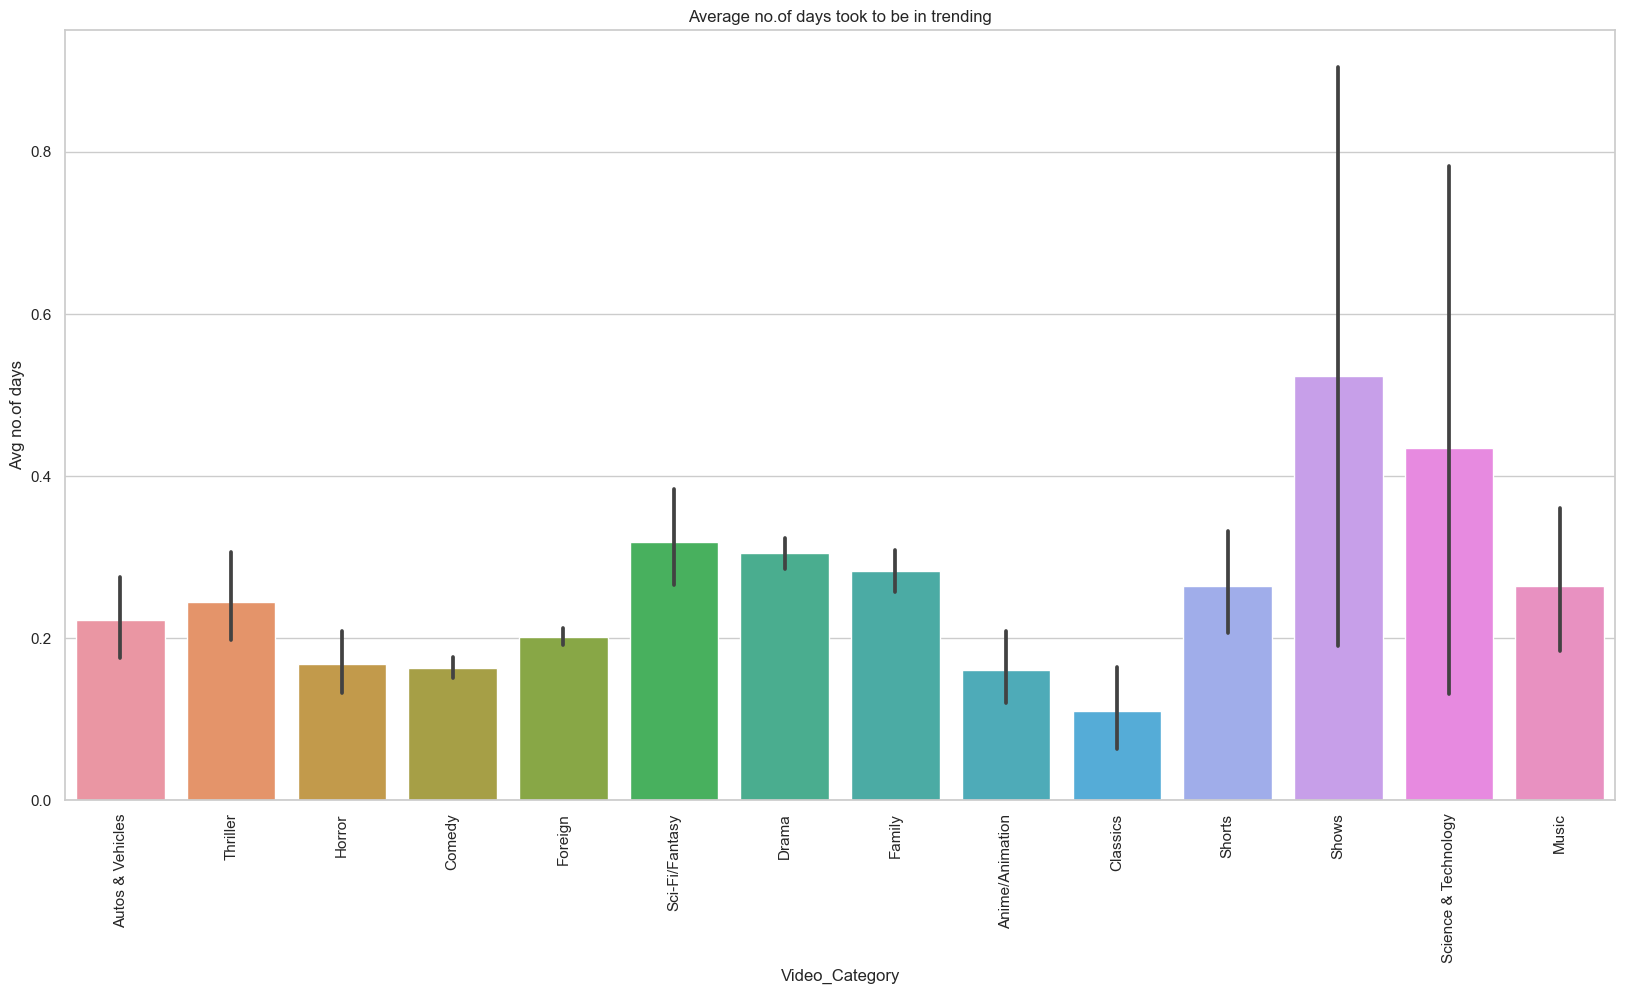

In [72]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])
#sns.violinplot(x = df_minViews.Video_Category, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("Avg no.of days")

In [73]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
90,n7C3aXBzM7s,நண்பா Mahesh Babu உனக்காக இது | Vijay VS Mahes...,2020-08-11 13:20:54+00:00,Little Talks,24,2020-08-12 00:00:00+00:00,little talks|kollywood news|tamil cinema news|...,441390,19862,483,1288,False,False,#Vijay #MaheshBabu #MasterGreen India challeng...,Foreign
91,lT6HV0Iweyo,कृष्ण जन्माष्टमी विशेष कीर्तन ! समाधान महाराज ...,2020-08-11 11:30:09+00:00,Marathi Tadka,24,2020-08-12 00:00:00+00:00,Marathi Tadka|मराठी तड़का|Marathi Tadka Videos|...,60749,477,80,18,False,False,किर्तनकार : समाधान महाराज शर्मा आपल्याला हि आप...,Foreign
115,ABrm1mQXj38,IPL 2020 - Patanjali IPL As Sponsor With 10 Bi...,2020-08-10 14:15:01+00:00,MY Cricket Production,17,2020-08-12 00:00:00+00:00,IPL|ipl 2020|ipl auction 2020|my cricket produ...,84754,11941,447,1862,False,False,Watch the 31st episode of IPL Ki Baat & Cricke...,Anime/Animation
116,nhO6cINEDs4,Gaadi Parking | Mirchi Murga | RJ Naved,2020-08-10 13:57:24+00:00,Mirchi Murga,23,2020-08-12 00:00:00+00:00,rj naved Mirchi murga latest|rj naved|Mirchi M...,395007,25223,429,946,False,False,RJ Naved and RJ Sayema together in a Murga! Ca...,Family
118,aUTu0cjX4Uw,FilterCopy | When Your Younger Sister Starts D...,2020-08-08 07:00:12+00:00,FilterCopy,23,2020-08-12 00:00:00+00:00,filtercopy|filtercopy ahsaas|ahsaas channa|ahs...,1836252,91361,2883,2810,False,False,You’re dating my sister? Hold on there bro ✋🏻T...,Family
